In [ ]:
# import os
# os.environ['CUDA_LAUNCH_BLOCKING'] = "1" ## os.environ : 환경변수 설정
# os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install mxnet
!pip install gluonnlp pandas tqdm
!pip install sentencepiece
!pip install transformers==3.0.2
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 49.1 MB 251 kB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 344 kB 7.8 MB/s 
  Created wheel for gluonnlp: filename=gluonnlp-0.10.0-cp37-cp37m-linux_x86_64.whl size=595754 sha256=244b289168d9d42071c574f913370de6ed34be94adcd93394c7127ff6e3d1c08
  Stored in directory: /root/.cache/pip/wheels/be/b4/06/7f3fdfaf707e6b5e98b79c041e023acffbe395d78a527eae00
Successfully built gluonnlp
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.2 MB 8.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg

In [ ]:
!pip install git+https://git@github.com/SKTBrain/KoBERT.git@master

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://****@github.com/SKTBrain/KoBERT.git (to revision master) to /tmp/pip-req-build-7o996lit
  Running command git clone -q 'https://****@github.com/SKTBrain/KoBERT.git' /tmp/pip-req-build-7o996lit
     |████████████████████████████████| 132 kB 7.1 MB/s 
     |████████████████████████████████| 4.5 MB 13.4 MB/s 
     |████████████████████████████████| 4.4 MB 82.5 MB/s 
     |████████████████████████████████| 6.6 MB 65.6 MB/s 
     |████████████████████████████████| 101 kB 14.0 MB/s 
     |████████████████████████████████| 596 kB 84.4 MB/s 
     |████████████████████████████████| 9.0 MB 52.3 MB/s 
     |████████████████████████████████| 79 kB 7.8 MB/s 
     |████████████████████████████████| 127 kB 74.3 MB/s 
  Created wheel for kobert: filename=kobert-0.2.3-py3-none-any.whl size=15674 sha256=58a0f1528f45764c2ef0800f3d6cb0d5c623ba82223d15a89f55588c943846ea
  Stored in directory

In [ ]:
!pip uninstall folium 
!pip install folium==0.2.1

Found existing installation: folium 0.8.3
Uninstalling folium-0.8.3:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/folium-0.8.3.dist-info/*
    /usr/local/lib/python3.7/dist-packages/folium/*
Proceed (y/n)? y
  Successfully uninstalled folium-0.8.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 4.7 MB/s 
  Created wheel for folium: filename=folium-0.2.1-py3-none-any.whl size=79808 sha256=04cdfd8e9d8533820616f5a98d17a48ba1d741b9845c12dae775dcd57a8f9e5b
  Stored in directory: /root/.cache/pip/wheels/9a/f0/3a/3f79a6914ff5affaf50cabad60c9f4d565283283c97f0bdccf
Successfully built folium


In [ ]:
import torch
import pandas as pd
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import gluonnlp as nlp
import numpy as np
from tqdm import tqdm, tqdm_notebook
from kobert.utils import get_tokenizer
from kobert.pytorch_kobert import get_pytorch_kobert_model
from transformers import AdamW
from transformers.optimization import get_cosine_schedule_with_warmup

In [ ]:
device = torch.device("cuda:0")

In [ ]:
bertmodel, vocab = get_pytorch_kobert_model()

/content/.cache/kobert_v1.zip[██████████████████████████████████████████████████]
/content/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece[██████████████████████████████████████████████████]


In [ ]:
dataset_train = nlp.data.TSVDataset('/content/drive/MyDrive/Team_1. CODEnter [ Save Form : FileName_Date ]/2. SUB _ MUSINSA/6. tsv/total_train.tsv', field_indices=[0,1], num_discard_samples=1)
dataset_test = nlp.data.TSVDataset('/content/drive/MyDrive/Team_1. CODEnter [ Save Form : FileName_Date ]/2. SUB _ MUSINSA/6. tsv/total_test.tsv', field_indices=[0,1], num_discard_samples=1)

In [ ]:
len(dataset_train)

160000

In [ ]:
class BERTDataset(Dataset):
    def __init__(self, dataset, sent_idx, label_idx, bert_tokenizer, max_len,
                 pad, pair):
        transform = nlp.data.BERTSentenceTransform(
            bert_tokenizer, max_seq_length=max_len, pad=pad, pair=pair)

        self.sentences = [transform([i[sent_idx]]) for i in dataset]
        self.labels = [np.int32(i[label_idx]) for i in dataset]

    def __getitem__(self, i):
        return (self.sentences[i] + (self.labels[i], ))

    def __len__(self):
        return (len(self.labels))

In [ ]:
max_len = 64
batch_size = 64
warmup_ratio = 0.1
num_epochs = 10
max_grad_norm = 1  
log_interval = 200
learning_rate =  5e-5

In [ ]:
tokenizer = get_tokenizer()
tok = nlp.data.BERTSPTokenizer(tokenizer, vocab, lower=False)
#BERTDataset 클래스 이용, TensorDataset으로 만들어주기
data_train = BERTDataset(dataset_train, 0, 1, tok, max_len, True, False)
data_test = BERTDataset(dataset_test, 0, 1, tok, max_len, True, False)

using cached model. /content/drive/MyDrive/Main Project Data/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece


In [ ]:
train_dataloader = torch.utils.data.DataLoader(data_train, batch_size=batch_size, num_workers=4)
test_dataloader = torch.utils.data.DataLoader(data_test, batch_size=batch_size, num_workers=4)

In [ ]:
class BERTClassifier(nn.Module):
    def __init__(self,
                 bert,
                 hidden_size = 768,
                 num_classes=5, ##주의: 클래스 수 바꾸어 주세요!##
                 dr_rate=None,
                 params=None):
        super(BERTClassifier, self).__init__()
        self.bert = bert
        self.dr_rate = dr_rate
                 
        self.classifier = nn.Linear(hidden_size , num_classes)
        if dr_rate:
            self.dropout = nn.Dropout(p=dr_rate)
    
    def gen_attention_mask(self, token_ids, valid_length):
        attention_mask = torch.zeros_like(token_ids)
        for i, v in enumerate(valid_length):
            attention_mask[i][:v] = 1
        return attention_mask.float()

    def forward(self, token_ids, valid_length, segment_ids):
        attention_mask = self.gen_attention_mask(token_ids, valid_length)
        
        _, pooler = self.bert(input_ids = token_ids, token_type_ids = segment_ids.long(), attention_mask = attention_mask.float().to(token_ids.device))
        if self.dr_rate:
            out = self.dropout(pooler)
        return self.classifier(out)

In [ ]:
model = BERTClassifier(bertmodel, dr_rate=0.5).to(device)

In [ ]:
# Prepare optimizer and schedule (linear warmup and decay)
no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

optimizer = AdamW(optimizer_grouped_parameters, lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()

t_total = len(train_dataloader) * num_epochs
warmup_step = int(t_total * warmup_ratio)

scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=warmup_step, num_training_steps=t_total)

In [ ]:
def calc_accuracy(X,Y):
    max_vals, max_indices = torch.max(X, 1)
    train_acc = (max_indices == Y).sum().data.cpu().numpy()/max_indices.size()[0]
    return train_acc

In [ ]:
loss_acc = {
    'train_loss' : [],
    'train_acc' : [],
    'valid_loss' : [],
    'valid_acc' : []
}

for e in range(num_epochs):
    train_acc = 0.0
    test_acc = 0.0
    model.train()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):
        optimizer.zero_grad()
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        loss = loss_fn(out, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
        optimizer.step()
        scheduler.step()  # Update learning rate schedule
        train_acc += calc_accuracy(out, label)
        if batch_id % log_interval == 0:
            print("epoch {} batch id {} loss {} train acc {}".format(e+1, batch_id+1, loss.data.cpu().numpy(), train_acc / (batch_id+1)))
    print("epoch {} train loss {} train acc {}".format(e+1, loss.data.cpu().numpy(), train_acc / (batch_id+1)))
    loss_acc['train_loss'].append(loss.data.cpu().numpy())
    loss_acc['train_acc'].append(train_acc / (batch_id+1))
    
    model.eval()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):
        token_ids1 = token_ids.long().to(device)
        segment_ids1 = segment_ids.long().to(device)
        valid_length1 = valid_length
        label1 = label.long().to(device)
        out1 = model(token_ids1, valid_length1, segment_ids1)
        loss1 = loss_fn(out1, label1)
        loss1.backward()
        test_acc += calc_accuracy(out1, label1)
    print("epoch {} validation loss {} validation acc {}".format(e+1, loss1.data.cpu().numpy(), test_acc / (batch_id+1)))
    loss_acc['valid_loss'].append(loss1.data.cpu().numpy())
    loss_acc['valid_acc'].append(test_acc / (batch_id+1))

  0%|          | 0/2500 [00:00<?, ?it/s]

epoch 1 batch id 1 loss 1.6537376642227173 train acc 0.171875
epoch 1 batch id 201 loss 1.1690516471862793 train acc 0.4058613184079602
epoch 1 batch id 401 loss 0.8842780590057373 train acc 0.5377571695760599
epoch 1 batch id 601 loss 0.7176340222358704 train acc 0.5862364808652246
epoch 1 batch id 801 loss 0.6951994895935059 train acc 0.6135689762796505
epoch 1 batch id 1001 loss 0.7958509922027588 train acc 0.6292457542457542
epoch 1 batch id 1201 loss 0.846759021282196 train acc 0.6411453996669442
epoch 1 batch id 1401 loss 0.8299648761749268 train acc 0.6499486973590293
epoch 1 batch id 1601 loss 0.6460318565368652 train acc 0.6561328856964397
epoch 1 batch id 1801 loss 0.6920517683029175 train acc 0.6614033870072182
epoch 1 batch id 2001 loss 0.84591144323349 train acc 0.6654485257371314
epoch 1 batch id 2201 loss 0.842987596988678 train acc 0.6686946274420718
epoch 1 batch id 2401 loss 0.5732792019844055 train acc 0.6714975531028738
epoch 1 train loss 0.7687669396400452 train ac

  0%|          | 0/625 [00:00<?, ?it/s]

epoch 1 validation loss 0.7121559977531433 validation acc 0.73375


  0%|          | 0/2500 [00:00<?, ?it/s]

epoch 2 batch id 1 loss 0.8581745624542236 train acc 0.59375
epoch 2 batch id 201 loss 0.6293399333953857 train acc 0.7140080845771144
epoch 2 batch id 401 loss 0.6029908061027527 train acc 0.7167238154613467
epoch 2 batch id 601 loss 0.6677806377410889 train acc 0.7178920549084858
epoch 2 batch id 801 loss 0.5879274606704712 train acc 0.7192181647940075
epoch 2 batch id 1001 loss 0.7097121477127075 train acc 0.7219187062937062
epoch 2 batch id 1201 loss 0.594529390335083 train acc 0.7231083472106578
epoch 2 batch id 1401 loss 0.6700335741043091 train acc 0.7256312455389008
epoch 2 batch id 1601 loss 0.442102313041687 train acc 0.7279532323547783
epoch 2 batch id 1801 loss 0.5249627828598022 train acc 0.7298549416990561
epoch 2 batch id 2001 loss 0.6669178009033203 train acc 0.7325087456271864
epoch 2 batch id 2201 loss 0.6084821224212646 train acc 0.7343820990458882
epoch 2 batch id 2401 loss 0.4970662593841553 train acc 0.7356570179092045
epoch 2 train loss 0.7159706354141235 train a

  0%|          | 0/625 [00:00<?, ?it/s]

epoch 2 validation loss 0.5491853356361389 validation acc 0.763275


  0%|          | 0/2500 [00:00<?, ?it/s]

epoch 3 batch id 1 loss 0.6344046592712402 train acc 0.703125
epoch 3 batch id 201 loss 0.4192521870136261 train acc 0.7708333333333334
epoch 3 batch id 401 loss 0.44250229001045227 train acc 0.7722880299251871
epoch 3 batch id 601 loss 0.3979039192199707 train acc 0.7697847337770383
epoch 3 batch id 801 loss 0.4115770161151886 train acc 0.7703456616729089
epoch 3 batch id 1001 loss 0.5343737602233887 train acc 0.7713536463536463
epoch 3 batch id 1201 loss 0.6450305581092834 train acc 0.7722600957535387
epoch 3 batch id 1401 loss 0.554896891117096 train acc 0.7737107423269094
epoch 3 batch id 1601 loss 0.4051966071128845 train acc 0.7755016396002499
epoch 3 batch id 1801 loss 0.4584830403327942 train acc 0.7768253747917824
epoch 3 batch id 2001 loss 0.5768154263496399 train acc 0.7783764367816092
epoch 3 batch id 2201 loss 0.5335389971733093 train acc 0.7798585870059064
epoch 3 batch id 2401 loss 0.39355984330177307 train acc 0.7814061849229488
epoch 3 train loss 0.6040421724319458 tra

  0%|          | 0/625 [00:00<?, ?it/s]

epoch 3 validation loss 0.6574337482452393 validation acc 0.7655


  0%|          | 0/2500 [00:00<?, ?it/s]

epoch 4 batch id 1 loss 0.5455235838890076 train acc 0.78125
epoch 4 batch id 201 loss 0.4659721255302429 train acc 0.8090018656716418
epoch 4 batch id 401 loss 0.3783797025680542 train acc 0.8087203865336658
epoch 4 batch id 601 loss 0.5088311433792114 train acc 0.8073783277870217
epoch 4 batch id 801 loss 0.3865252733230591 train acc 0.8086376404494382
epoch 4 batch id 1001 loss 0.6114399433135986 train acc 0.8096590909090909
epoch 4 batch id 1201 loss 0.4286094605922699 train acc 0.8103923813488759
epoch 4 batch id 1401 loss 0.5106559991836548 train acc 0.8118977516059958
epoch 4 batch id 1601 loss 0.30738571286201477 train acc 0.8134466739537789
epoch 4 batch id 1801 loss 0.39633116126060486 train acc 0.8145214464186563
epoch 4 batch id 2001 loss 0.37491416931152344 train acc 0.8164042978510745
epoch 4 batch id 2201 loss 0.41854327917099 train acc 0.8177319968196275
epoch 4 batch id 2401 loss 0.36064764857292175 train acc 0.8189296126613911
epoch 4 train loss 0.4148074686527252 tra

  0%|          | 0/625 [00:00<?, ?it/s]

epoch 4 validation loss 0.5973920822143555 validation acc 0.7848


  0%|          | 0/2500 [00:00<?, ?it/s]

epoch 5 batch id 1 loss 0.6769233345985413 train acc 0.75
epoch 5 batch id 201 loss 0.3400534987449646 train acc 0.8439054726368159
epoch 5 batch id 401 loss 0.31345492601394653 train acc 0.8460879052369077
epoch 5 batch id 601 loss 0.34994998574256897 train acc 0.8446339434276207
epoch 5 batch id 801 loss 0.23980951309204102 train acc 0.846519975031211
epoch 5 batch id 1001 loss 0.3189952075481415 train acc 0.8480113636363636
epoch 5 batch id 1201 loss 0.4197555184364319 train acc 0.8493833263946711
epoch 5 batch id 1401 loss 0.4958798289299011 train acc 0.850653551034975
epoch 5 batch id 1601 loss 0.2106040120124817 train acc 0.8514795440349782
epoch 5 batch id 1801 loss 0.3969115912914276 train acc 0.8528681982232094
epoch 5 batch id 2001 loss 0.4377889037132263 train acc 0.8544868190904548
epoch 5 batch id 2201 loss 0.3753969669342041 train acc 0.8559106656065425
epoch 5 batch id 2401 loss 0.30308520793914795 train acc 0.8570452415660141
epoch 5 train loss 0.3615450859069824 train 

  0%|          | 0/625 [00:00<?, ?it/s]

epoch 5 validation loss 0.6264064311981201 validation acc 0.7874


  0%|          | 0/2500 [00:00<?, ?it/s]

epoch 6 batch id 1 loss 0.5197488069534302 train acc 0.8125
epoch 6 batch id 201 loss 0.22881704568862915 train acc 0.8800528606965174
epoch 6 batch id 401 loss 0.2075268030166626 train acc 0.881468204488778
epoch 6 batch id 601 loss 0.2603965699672699 train acc 0.881109608985025
epoch 6 batch id 801 loss 0.22920943796634674 train acc 0.8817493757802747
epoch 6 batch id 1001 loss 0.24810171127319336 train acc 0.883631993006993
epoch 6 batch id 1201 loss 0.394212931394577 train acc 0.8848615736885929
epoch 6 batch id 1401 loss 0.42408162355422974 train acc 0.885450124910778
epoch 6 batch id 1601 loss 0.23225493729114532 train acc 0.8865259993753903
epoch 6 batch id 1801 loss 0.2724183201789856 train acc 0.8878574403109384
epoch 6 batch id 2001 loss 0.2819066345691681 train acc 0.8893053473263368
epoch 6 batch id 2201 loss 0.25857308506965637 train acc 0.8898157087687415
epoch 6 batch id 2401 loss 0.2593874931335449 train acc 0.8904948458975427
epoch 6 train loss 0.24700438976287842 trai

  0%|          | 0/625 [00:00<?, ?it/s]

epoch 6 validation loss 0.6318928003311157 validation acc 0.802925


  0%|          | 0/2500 [00:00<?, ?it/s]

epoch 7 batch id 1 loss 0.2650173008441925 train acc 0.890625
epoch 7 batch id 201 loss 0.29266801476478577 train acc 0.9142568407960199
epoch 7 batch id 401 loss 0.3289359211921692 train acc 0.9132637157107232
epoch 7 batch id 601 loss 0.15243011713027954 train acc 0.9126715890183028
epoch 7 batch id 801 loss 0.20500300824642181 train acc 0.9148720349563046
epoch 7 batch id 1001 loss 0.2686275839805603 train acc 0.9141951798201798
epoch 7 batch id 1201 loss 0.1550099402666092 train acc 0.9147195045795171
epoch 7 batch id 1401 loss 0.2771938443183899 train acc 0.9158859743040685
epoch 7 batch id 1601 loss 0.11714572459459305 train acc 0.9167805277951281
epoch 7 batch id 1801 loss 0.20447854697704315 train acc 0.9180663520266519
epoch 7 batch id 2001 loss 0.1989511400461197 train acc 0.9192981634182908
epoch 7 batch id 2201 loss 0.20964401960372925 train acc 0.9200931394820536
epoch 7 batch id 2401 loss 0.22680413722991943 train acc 0.9209118596418159
epoch 7 train loss 0.15475702285766

  0%|          | 0/625 [00:00<?, ?it/s]

epoch 7 validation loss 0.7437866926193237 validation acc 0.81005


  0%|          | 0/2500 [00:00<?, ?it/s]

epoch 8 batch id 1 loss 0.14180782437324524 train acc 0.953125
epoch 8 batch id 201 loss 0.27665573358535767 train acc 0.9408426616915423
epoch 8 batch id 401 loss 0.1723567396402359 train acc 0.9402275561097256
epoch 8 batch id 601 loss 0.1091875433921814 train acc 0.9379679700499168
epoch 8 batch id 801 loss 0.12948645651340485 train acc 0.9394701935081149
epoch 8 batch id 1001 loss 0.15502327680587769 train acc 0.9397321428571429
epoch 8 batch id 1201 loss 0.15042850375175476 train acc 0.9396206286427977
epoch 8 batch id 1401 loss 0.22601963579654694 train acc 0.9404108672376874
epoch 8 batch id 1601 loss 0.1301680952310562 train acc 0.9404376171143035
epoch 8 batch id 1801 loss 0.16421671211719513 train acc 0.9412739450305386
epoch 8 batch id 2001 loss 0.14252598583698273 train acc 0.9422632433783108
epoch 8 batch id 2201 loss 0.14446213841438293 train acc 0.9428171853702862
epoch 8 batch id 2401 loss 0.11753474175930023 train acc 0.9435521657642649
epoch 8 train loss 0.08507768809

  0%|          | 0/625 [00:00<?, ?it/s]

epoch 8 validation loss 0.8308956623077393 validation acc 0.8094


  0%|          | 0/2500 [00:00<?, ?it/s]

epoch 9 batch id 1 loss 0.10099510848522186 train acc 0.953125
epoch 9 batch id 201 loss 0.11656437069177628 train acc 0.957011815920398
epoch 9 batch id 401 loss 0.17499107122421265 train acc 0.9553460099750624
epoch 9 batch id 601 loss 0.09101016074419022 train acc 0.9544769134775375
epoch 9 batch id 801 loss 0.030355919152498245 train acc 0.9562656054931336
epoch 9 batch id 1001 loss 0.14156723022460938 train acc 0.9561688311688312
epoch 9 batch id 1201 loss 0.07522151619195938 train acc 0.9562864279766861
epoch 9 batch id 1401 loss 0.2460562288761139 train acc 0.956091630977873
epoch 9 batch id 1601 loss 0.03454934060573578 train acc 0.9562968457214241
epoch 9 batch id 1801 loss 0.20042982697486877 train acc 0.9568035119378123
epoch 9 batch id 2001 loss 0.18492618203163147 train acc 0.9573104072963519
epoch 9 batch id 2201 loss 0.22469599545001984 train acc 0.9573915265788278
epoch 9 batch id 2401 loss 0.10635114461183548 train acc 0.9573875468554769
epoch 9 train loss 0.0592843070

  0%|          | 0/625 [00:00<?, ?it/s]

epoch 9 validation loss 0.8553463220596313 validation acc 0.813525


  0%|          | 0/2500 [00:00<?, ?it/s]

epoch 10 batch id 1 loss 0.06623122841119766 train acc 0.984375
epoch 10 batch id 201 loss 0.1547057330608368 train acc 0.9642412935323383
epoch 10 batch id 401 loss 0.1302342712879181 train acc 0.9639572942643392
epoch 10 batch id 601 loss 0.07794167101383209 train acc 0.9642262895174709
epoch 10 batch id 801 loss 0.06348603963851929 train acc 0.9649461610486891
epoch 10 batch id 1001 loss 0.08583739399909973 train acc 0.9642857142857143
epoch 10 batch id 1201 loss 0.2072710543870926 train acc 0.9637541631973355
epoch 10 batch id 1401 loss 0.10404374450445175 train acc 0.9634524446823698
epoch 10 batch id 1601 loss 0.10817564278841019 train acc 0.9630797158026234
epoch 10 batch id 1801 loss 0.12892985343933105 train acc 0.9632669350360911
epoch 10 batch id 2001 loss 0.1064511388540268 train acc 0.9634791979010495
epoch 10 batch id 2201 loss 0.1209271252155304 train acc 0.9633618241708315
epoch 10 batch id 2401 loss 0.08855969458818436 train acc 0.9633616201582674
epoch 10 train loss 0

  0%|          | 0/625 [00:00<?, ?it/s]

epoch 10 validation loss 0.8922427892684937 validation acc 0.814575


In [ ]:
df = pd.DataFrame(loss_acc)
df

,train_loss,train_acc,valid_loss,valid_acc
0,0.76876694,0.672756,0.712156,0.733750
1,0.71597064,0.736456,0.54918534,0.763275
2,0.6040422,0.782131,0.65743375,0.765500
3,0.41480747,0.819562,0.5973921,0.784800
4,0.3615451,0.857631,0.62640643,0.787400
5,0.24700439,0.890844,0.6318928,0.802925
6,0.15475702,0.921194,0.7437867,0.810050
7,0.08507769,0.943700,0.83089566,0.809400
8,0.059284307,0.957431,0.8553463,0.813525
9,0.104875036,0.963337,0.8922428,0.814575


In [ ]:
import matplotlib.pyplot as plt

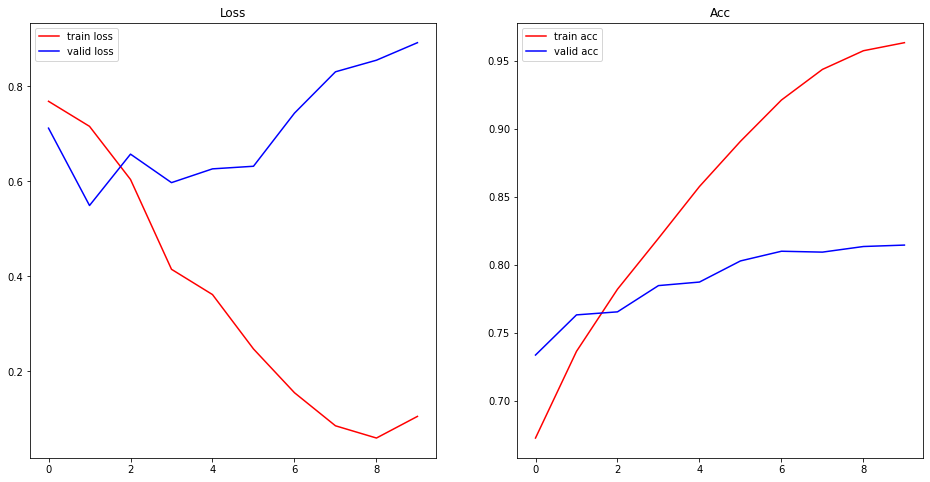

In [ ]:
fig = plt.figure(figsize=(16, 8))

ax = fig.add_subplot(1, 2, 1)
ax.plot(loss_acc["train_loss"], color="red", label="train loss")
ax.plot(loss_acc["valid_loss"], color="blue", label="valid loss")
ax.title.set_text("Loss")
ax.legend()

ax = fig.add_subplot(1, 2, 2)
ax.plot(loss_acc["train_acc"], color="red", label="train acc")
ax.plot(loss_acc["valid_acc"], color="blue", label="valid acc")
ax.title.set_text("Acc")
ax.legend()

plt.show()

# TEST

In [ ]:
new_test = nlp.data.TSVDataset('/content/drive/MyDrive/Team_1. CODEnter [ Save Form : FileName_Date ]/2. SUB _ MUSINSA/6. tsv/final_test.tsv', field_indices=[0,1], num_discard_samples=1)
test_set = BERTDataset(new_test , 0, 1, tok, max_len, True, False)
test_input = torch.utils.data.DataLoader(test_set, batch_size=1, num_workers=4)

In [ ]:
for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_input)): 
  token_ids = token_ids.long().to(device) 
  segment_ids = segment_ids.long().to(device) 
  valid_length= valid_length 
  out = model(token_ids, valid_length, segment_ids)
  prediction = out.cpu().detach().numpy().argmax()
  print(batch_id, prediction)

In [ ]:
def test_calc_accuracy(X,Y):
    max_vals, max_indices = torch.max(X, 1)
    test_acc = (max_indices == Y).sum().data.cpu().numpy()/max_indices.size()[0]
    return test_acc

In [ ]:
for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_input)): 
    token_ids = token_ids.long().to(device) 
    segment_ids = segment_ids.long().to(device) 
    valid_length= valid_length 
    label = label.long().to(device)
    out = model(token_ids, valid_length, segment_ids)
    prediction = out.cpu().detach().numpy().argmax()
    test_acc += calc_accuracy(out, label)
    print(batch_id, prediction+1)
print("epoch {} validation acc {}".format(e+1, test_acc / (batch_id+1)))


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Main Project Data/')
os.getcwd()

'/content/drive/MyDrive/Main Project Data'

In [ ]:
import os
os.chdir('/content/drive/MyDrive/Main Project Data/')
os.getcwd()

path = '/content/drive/MyDrive/Main Project Data/'
torch.save(model, path + '5stars_model.pt')  # 전체 모델 저장

In [ ]:
torch.save(model.state_dict(), '5stars_model_state_dict.pt')  # 모델 객체의 state_dict 저장

torch.save({
    'model': model.state_dict(),
    'optimizer': optimizer.state_dict()
}, '5stars_all.tar') 

In [ ]:
model1 = torch.load('5stars_model.pt')  # 전체 모델을 통째로 불러옴, 클래스 선언 필수
model1.load_state_dict(torch.load('5stars_model_state_dict.pt'))  # state_dict를 불러 온 후, 모델에 저장

checkpoint = torch.load('5stars_all.tar')   # dict 불러오기
model1.load_state_dict(checkpoint['model'])
optimizer.load_state_dict(checkpoint['optimizer'])

In [ ]:
import warnings
warnings.filterwarnings('ignore') # output 경고문구 없애기

In [ ]:
# tokenizer = get_tokenizer()
# tok = nlp.data.BERTSPTokenizer(tokenizer, vocab, lower=False)



def predict(predict_sentence):

    data = [predict_sentence, '0']
    dataset_another = [data]

    another_test = BERTDataset(dataset_another, 0, 1, tok, max_len, True, False)
    test_dataloader = torch.utils.data.DataLoader(another_test, batch_size=batch_size, num_workers=5)
    
    model1.eval()

    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(test_dataloader):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)

        valid_length= valid_length
        label = label.long().to(device)

        out = model1(token_ids, valid_length, segment_ids)


        test_eval=[]
        for i in out:
            logits=i
            logits = logits.detach().cpu().numpy()

            if np.argmax(logits) == 0:
                test_eval.append("1점")
            elif np.argmax(logits) == 1:
                test_eval.append("2점")
            elif np.argmax(logits) == 2:
                test_eval.append("3점")
            elif np.argmax(logits) == 3:
                test_eval.append("4점")
            elif np.argmax(logits) == 4:
                test_eval.append("5점")
            

        print(test_eval[0] + " 입니다.")

In [ ]:
predict(input('>> 리뷰 내용을 입력해주세요 : '))


>> 리뷰 내용을 입력해주세요 : 중국산 아니랄까봐.. 저렴한만큼 합니다. 손잡이 마무리 엉망이에요...이도 안맞게 박음질처리를 했네요.....
1점 입니다.


In [ ]:
end = 1
while end == 1 :
    sentence = input('>> 리뷰 내용을 입력해주세요 : ')
    if sentence == 0 :
        break
    predict(sentence)
    print("\n")

>> 리뷰 내용을 입력해주세요 : 여러분 여성분이면 가장 작은 사이즈 추천 드려요.. 저 하비여서 L시켰다가 너무 길이고 길고 커서 ㅠㅜ 바지 밑단에 고무줄로 수선하고 죠거바지처럼 입고 다녀여....
3점 입니다.


>> 리뷰 내용을 입력해주세요 : 아이스 쿨링 와이드 팬츠 로프 블랙과 차콜 구매하면서 같이 구매했는데 냉장고 원단에 디자인이 큼직하게 있어서 화려하기도 무난하기도 하지만 무엇보다 너무 시원해서 좋아요.  몸에 붙지 않고 사이즈도 넉넉해서 집에서 정말 편하게 잘 입고 있답니다.  구김도 없고 찰랑찰랑, 팔랑팔랑 이번 여름은 아이스 쿨링 롱팬츠로 우아하면서도 시원하게 보낼 것 같아서 대만족합니다.
5점 입니다.


>> 리뷰 내용을 입력해주세요 : 곰돌이 조거 L 구입했습니다. 시원한 재질이고 주머니가 있어 편하네요. 살짝 비침이 있지만 실내복으로 입기에 아주 좋습니다. 아무래도 곰돌이다 보니 외출하기엔 잠옷같은 느낌이 있네요 ㅎㅎ 발목부분이 조거바지라서 밑단이 흘러내림이 없어 활동할때 편합니다. 배부분의 밴드가 어떨지 몰라서 넉넉하게 L 구입했는데
4점 입니다.


>> 리뷰 내용을 입력해주세요 : 여름에 시원하고 편하게 입으려고 구매했습니다. 물론 가격도 싸고요. 고무줄이 들어가서 편하네요. 단점은 허리에 띠는 왜 달아놓았는지 모르겠네요? 악세사리도 아니고 걸리적 거리기만 하네요. 차라리 안달아 놓았으면 좋았을텐데요. 칼로 떼어 버렸습니다. 감사합니다.
4점 입니다.


>> 리뷰 내용을 입력해주세요 : 가성비좋아요 무탠다드 쇼츠 세일때 잘산듯 딱 여름 전투용
4점 입니다.


>> 리뷰 내용을 입력해주세요 : 얇고 가성비 좋고 시원하고 매우 좋네요 많이 파세여
4점 입니다.


>> 리뷰 내용을 입력해주세요 : 아니 무슨 허리가 이렇게 작은지 궁딩이에서 넣기 힘드네요 ㅜㅡㅜ
4점 입니다.


>> 리뷰 내용을 입력해주세요 : 아 딱 좋아요 배송이 애매했던 것 빼고 다 만족입니다.
4점 입니다.


>> 리뷰 내용을 입력해주세요 : 다른 색은 

KeyboardInterrupt: ignored